In [58]:
import pandas as pd

from helper_functions import read_data, get_impl_date
from definitions import data_path, show_plots, data_source_path, figures_path, \
    target_countries, fig_size, show_plots, save_figs, show_results, date_col
from plot_functions import plot_corr

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

from sklearn.preprocessing import StandardScaler
import numpy as np

from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

In [59]:
def flatten(lst):
    return [item for sublist in lst for item in sublist]

In [10]:
timeframe = 'm'
target_country = 'united kingdom'
target_var = 'co2'
diff_level, diff_order = 12, 2
date_start = '2004-01-01'

In [11]:
df_raw = read_data(data_path, f'total_{timeframe}')
df = df_raw.copy()
df

,country,date,year,month,co2,gdp,pop,co2_cap,gdp_cap
0,austria,2000-01-01,2000,1,9.726928e+09,2.309478e+11,8.003000e+09,1.215410,28.857653
1,austria,2000-02-01,2000,2,8.532685e+09,2.321217e+11,8.004700e+09,1.065959,28.998180
2,austria,2000-03-01,2000,3,8.134567e+09,2.332957e+11,8.006400e+09,1.016008,29.138647
3,austria,2000-04-01,2000,4,6.546738e+09,2.344696e+11,8.008100e+09,0.817514,29.279055
4,austria,2000-05-01,2000,5,5.603262e+09,2.352176e+11,8.010100e+09,0.699525,29.365122
...,...,...,...,...,...,...,...,...,...
4517,united kingdom,2019-06-01,2019,6,2.864851e+10,3.302814e+12,6.684433e+10,0.428585,49.410534
4518,united kingdom,2019-07-01,2019,7,2.872032e+10,3.322513e+12,6.686800e+10,0.429508,49.687638
4519,united kingdom,2019-08-01,2019,8,2.809851e+10,3.338771e+12,6.689167e+10,0.420060,49.913109
4520,united kingdom,2019-09-01,2019,9,3.070698e+10,3.355029e+12,6.691533e+10,0.458893,50.138420


In [121]:
df_stat_raw = read_data(data_path, f'total_{timeframe}_stat')
df_stat = df_stat_raw.copy()
df_stat

,country,date,year,month,co2,gdp,pop
0,austria,2004-01-01,2004,1,0.016414,-0.002771,0.001654
1,austria,2004-02-01,2004,2,-0.211701,0.004607,0.001659
2,austria,2004-03-01,2004,3,-0.007279,0.011934,0.001665
3,austria,2004-04-01,2004,4,-0.048942,0.019209,0.001670
4,austria,2004-05-01,2004,5,0.131721,0.022808,0.001784
...,...,...,...,...,...,...,...
3677,united kingdom,2019-06-01,2019,6,-0.034837,0.020092,-0.002693
3678,united kingdom,2019-07-01,2019,7,-0.065623,0.023307,-0.002647
3679,united kingdom,2019-08-01,2019,8,-0.038079,0.025343,-0.002607
3680,united kingdom,2019-09-01,2019,9,0.000189,0.027362,-0.002566


<AxesSubplot:xlabel='date'>

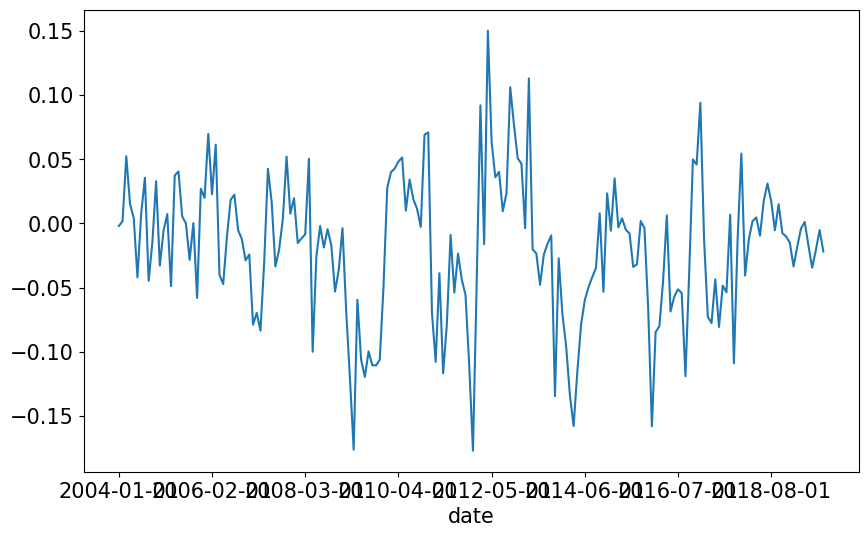

In [120]:
col = 'act'

act_pred_diff = pd.read_csv(f'output/tables/results/{target_country}/{target_country}_act_pred_diff.csv')
act_pred_diff
act_pred_diff.set_index('date')[col].plot(figsize=fig_size)

                 act   act_new
date                          
2004-01-01       NaN       NaN
2004-02-01       NaN       NaN
2004-03-01       NaN       NaN
2004-04-01       NaN       NaN
2004-05-01       NaN       NaN
2004-06-01       NaN       NaN
2004-07-01       NaN       NaN
2004-08-01       NaN       NaN
2004-09-01       NaN       NaN
2004-10-01       NaN       NaN
2004-11-01       NaN       NaN
2004-12-01       NaN       NaN
2005-01-01       NaN       NaN
2005-02-01       NaN       NaN
2005-03-01       NaN       NaN
2005-04-01       NaN       NaN
2005-05-01       NaN       NaN
2005-06-01       NaN       NaN
2005-07-01       NaN       NaN
2005-08-01       NaN       NaN
2005-09-01       NaN       NaN
2005-10-01       NaN       NaN
2005-11-01       NaN       NaN
2005-12-01       NaN       NaN
2006-01-01  0.075335  0.075335
2006-02-01  0.015415  0.015415
2006-03-01  0.110336  0.110336
2006-04-01 -0.077469 -0.077469
2006-05-01 -0.087834 -0.087834
2006-06-01 -0.015897 -0.015897
2006-07-

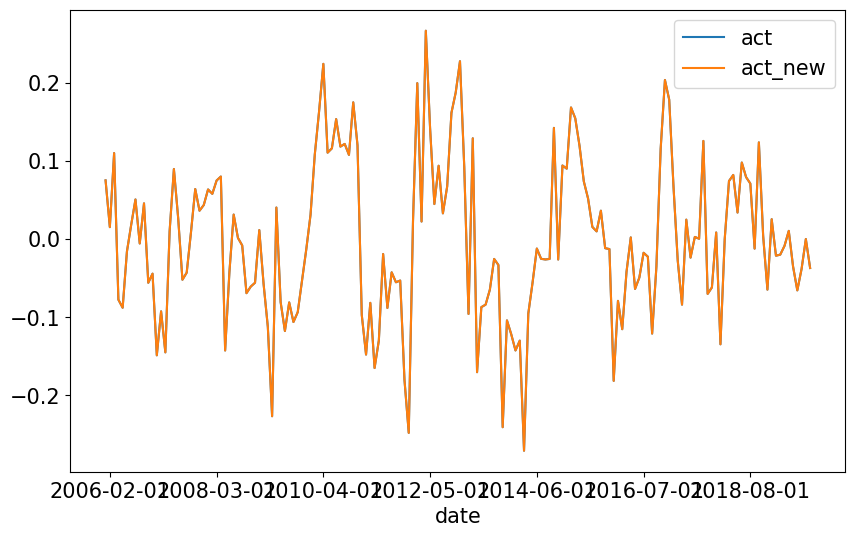

In [119]:
col = 'act'

orig = df[(df['country']==target_country) & (df['date']>=date_start)].set_index('date')[target_var]

orig_log = np.log(orig)

orig_log_diff1 = orig_log.diff(diff_level)

orig_log_diff2 = orig_log_diff1.diff(diff_level)

orig_log_diff2_stand = np.array(SS.fit_transform(np.array(orig_log_diff2).reshape(-1, 1)))
# orig_log_diff2_stand = np.array(act_pred[col]).reshape(-1, 1)

orig_log_diff2_new = np.array(flatten(SS.inverse_transform(orig_log_diff2_stand)))

# orig_log_diff1_new = np.zeros(len(orig_log_diff1))
# orig_log_diff1_new[diff_level:2*diff_level] = orig_log_diff1[diff_level:2*diff_level]
# for i in range(2*diff_level, len(orig_log_diff1)):
#     orig_log_diff1_new[i] = orig_log_diff1_new[i-diff_level] + orig_log_diff2_new[i]

# orig_log_new = np.zeros(len(orig_log))
# orig_log_new[:diff_level] = orig_log[:diff_level]
# for i in range(diff_level, len(orig_log)):
#     orig_log_new[i] = orig_log_new[i-diff_level] + orig_log_diff1_new[i]

    
    
# test = orig_log_diff2_stand
test = pd.DataFrame(list(zip(orig_log_diff2, orig_log_diff2_new)),
                                 columns=[col, f'{col}_new']).set_index(orig.index)
print(test[:50])
if type(test) in [np.ndarray]:
    plt.figure(figsize=fig_size)
    plt.plot(test)
else:
    test.plot(figsize=fig_size)

In [63]:
# orig = df[(df['country']==target_country) & (df['date']>=date_start)].set_index('date')[target_var]

# orig = np.log(orig)

# orig = orig_log.diff(12).diff(12)

# orig = pd.DataFrame(SS.fit_transform(np.array(orig_log_diff2).reshape(-1, 1)), columns=[col])

# orig = pd.DataFrame(flatten(SS.inverse_transform(orig)))

# orig.plot(figsize=fig_size)